# K-NN classification

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape    #59개 데이터 7개 클래스

(59, 7)

In [5]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
# x = [1, 2, 3] y = [a, b, c]
# zip (x, y) -> [1, a], [2, b], [3, c]

In [6]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [7]:
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) #시드는 0

In [8]:
X_train.head()  #랜덤하게 

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


<IPython.core.display.Javascript object>


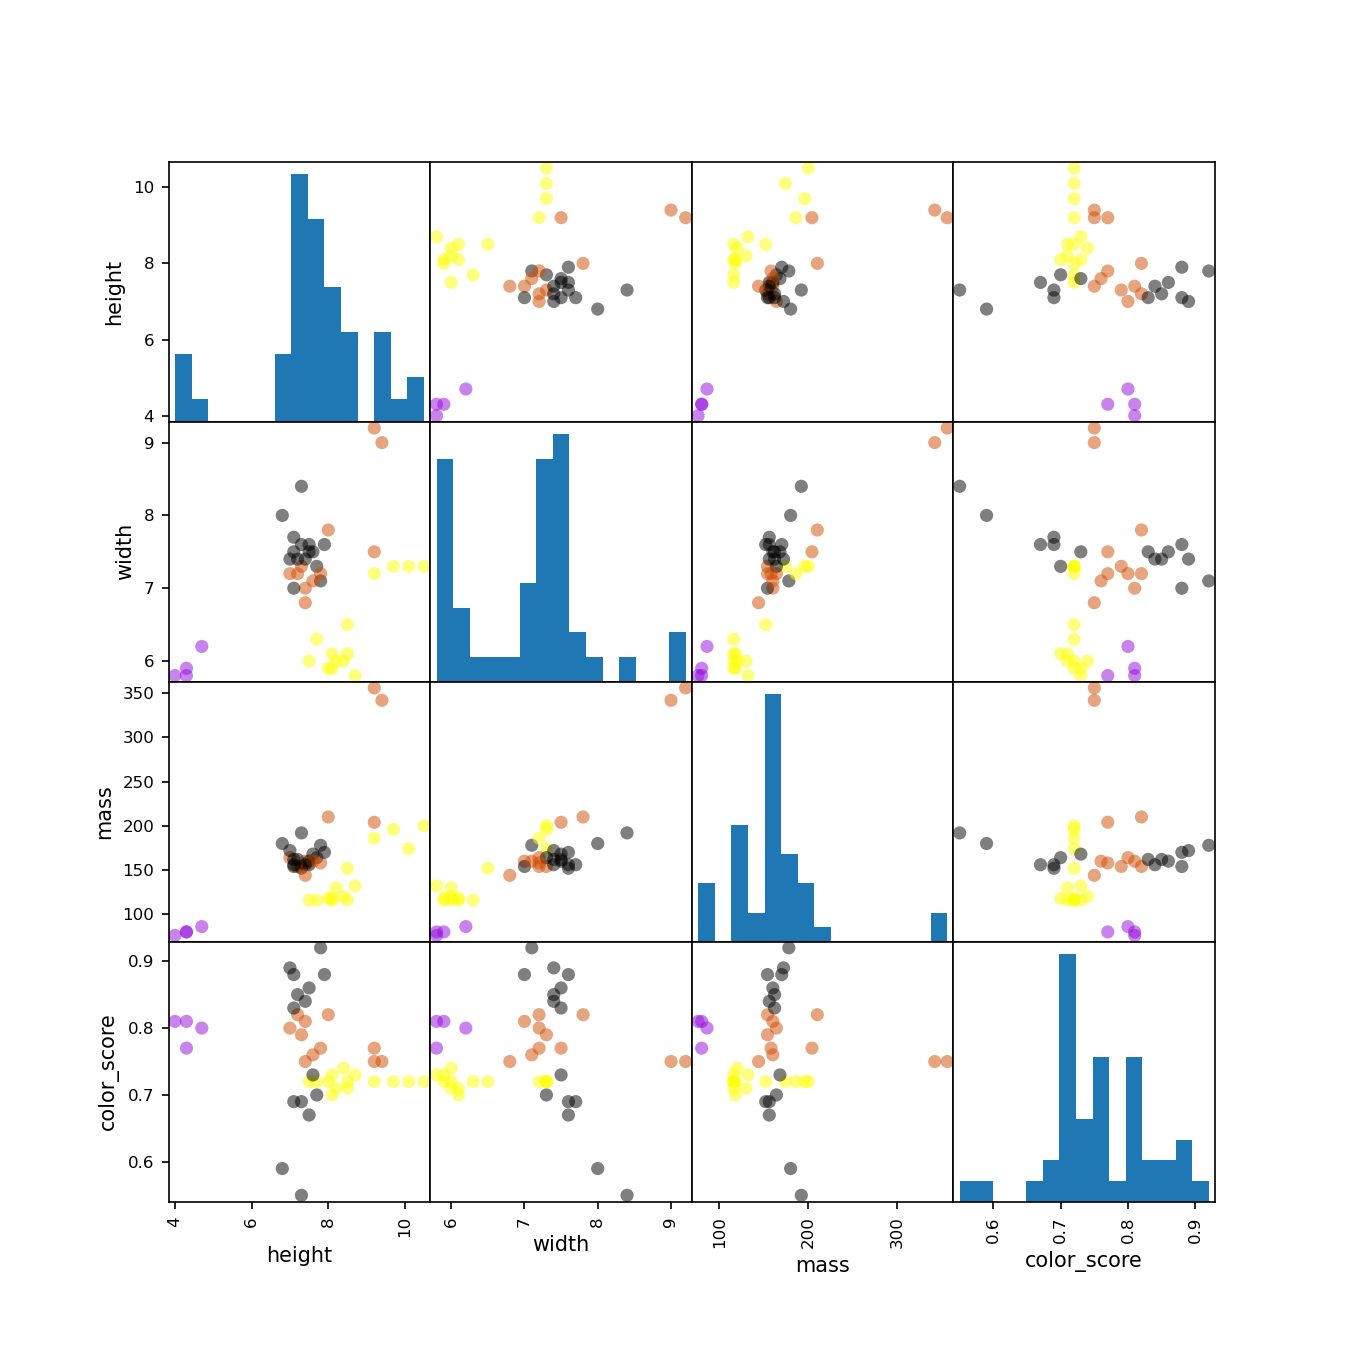

In [9]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, 
                                     c = y_train, marker = 'o', 
                                     s = 40, 
                                     hist_kwds = {'bins' : 15}, 
                                     figsize = (9, 9), 
                                     cmap = cmap)

In [15]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
knn.score(X_test, y_test)

0.5333333333333333

In [19]:
knn.score(X_train, y_train)

0.7954545454545454

In [20]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [23]:
#parameter change
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

In [24]:
scores

[0.6,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.26666666666666666,
 0.3333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

<IPython.core.display.Javascript object>


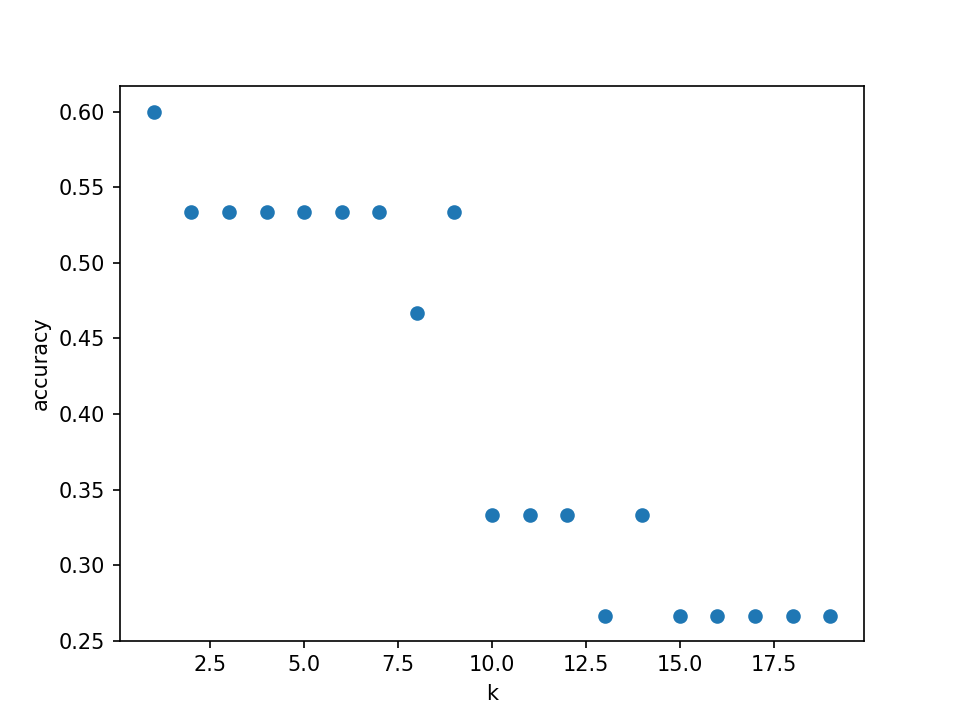

In [25]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

In [32]:
#Sensitiveness of k-NN classification according to split proportion

t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)

scores = []
for s in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - s)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

In [33]:
scores

[0.6666666666666666,
 0.5555555555555556,
 0.7083333333333334,
 0.5666666666666667,
 0.4722222222222222,
 0.5238095238095238,
 0.3333333333333333]

<IPython.core.display.Javascript object>


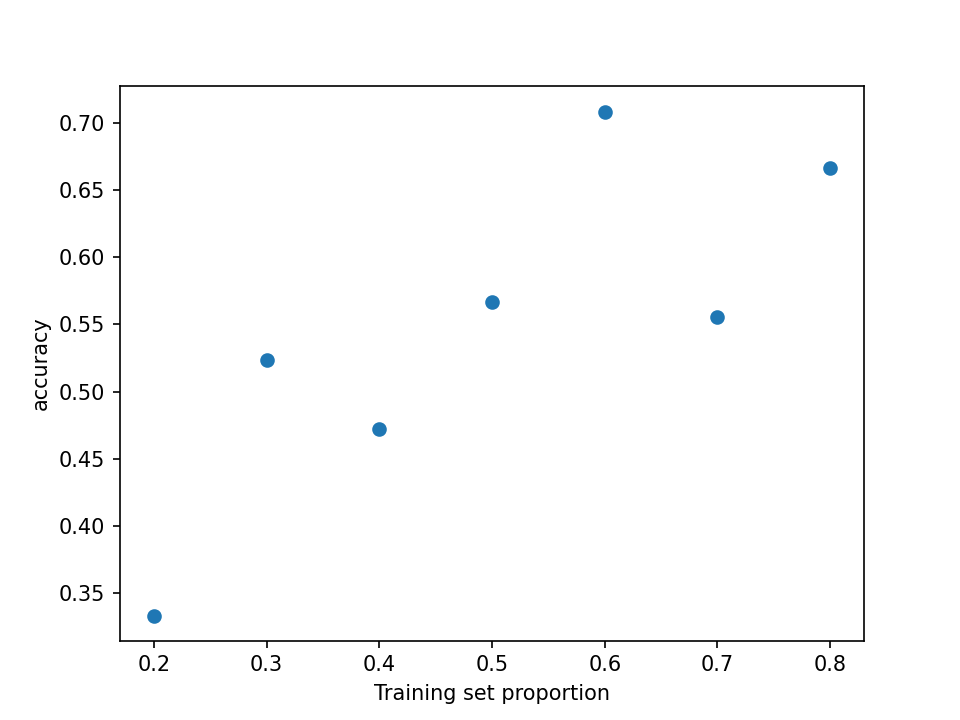

In [34]:
plt.figure()
plt.xlabel('Training set proportion')
plt.ylabel('accuracy')
plt.scatter(t, scores)